## Quantum Phase Estimation

This phase estimation algorithm is intended to be implemented under the framework of QSVT (Quantum Singular Value Transformation). However, after considerable simplification, this implementation is **equivalent** to the *ordinary* phase estimation algorithm (the one with inverse QFT).

See [A Grand Unification of Quantum Algorithms](https://arxiv.org/abs/2105.02859), p.21.

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Operator, Statevector

import numpy as np

from qsvt.algorithms import phase_estimation

eigvec_dim: 2


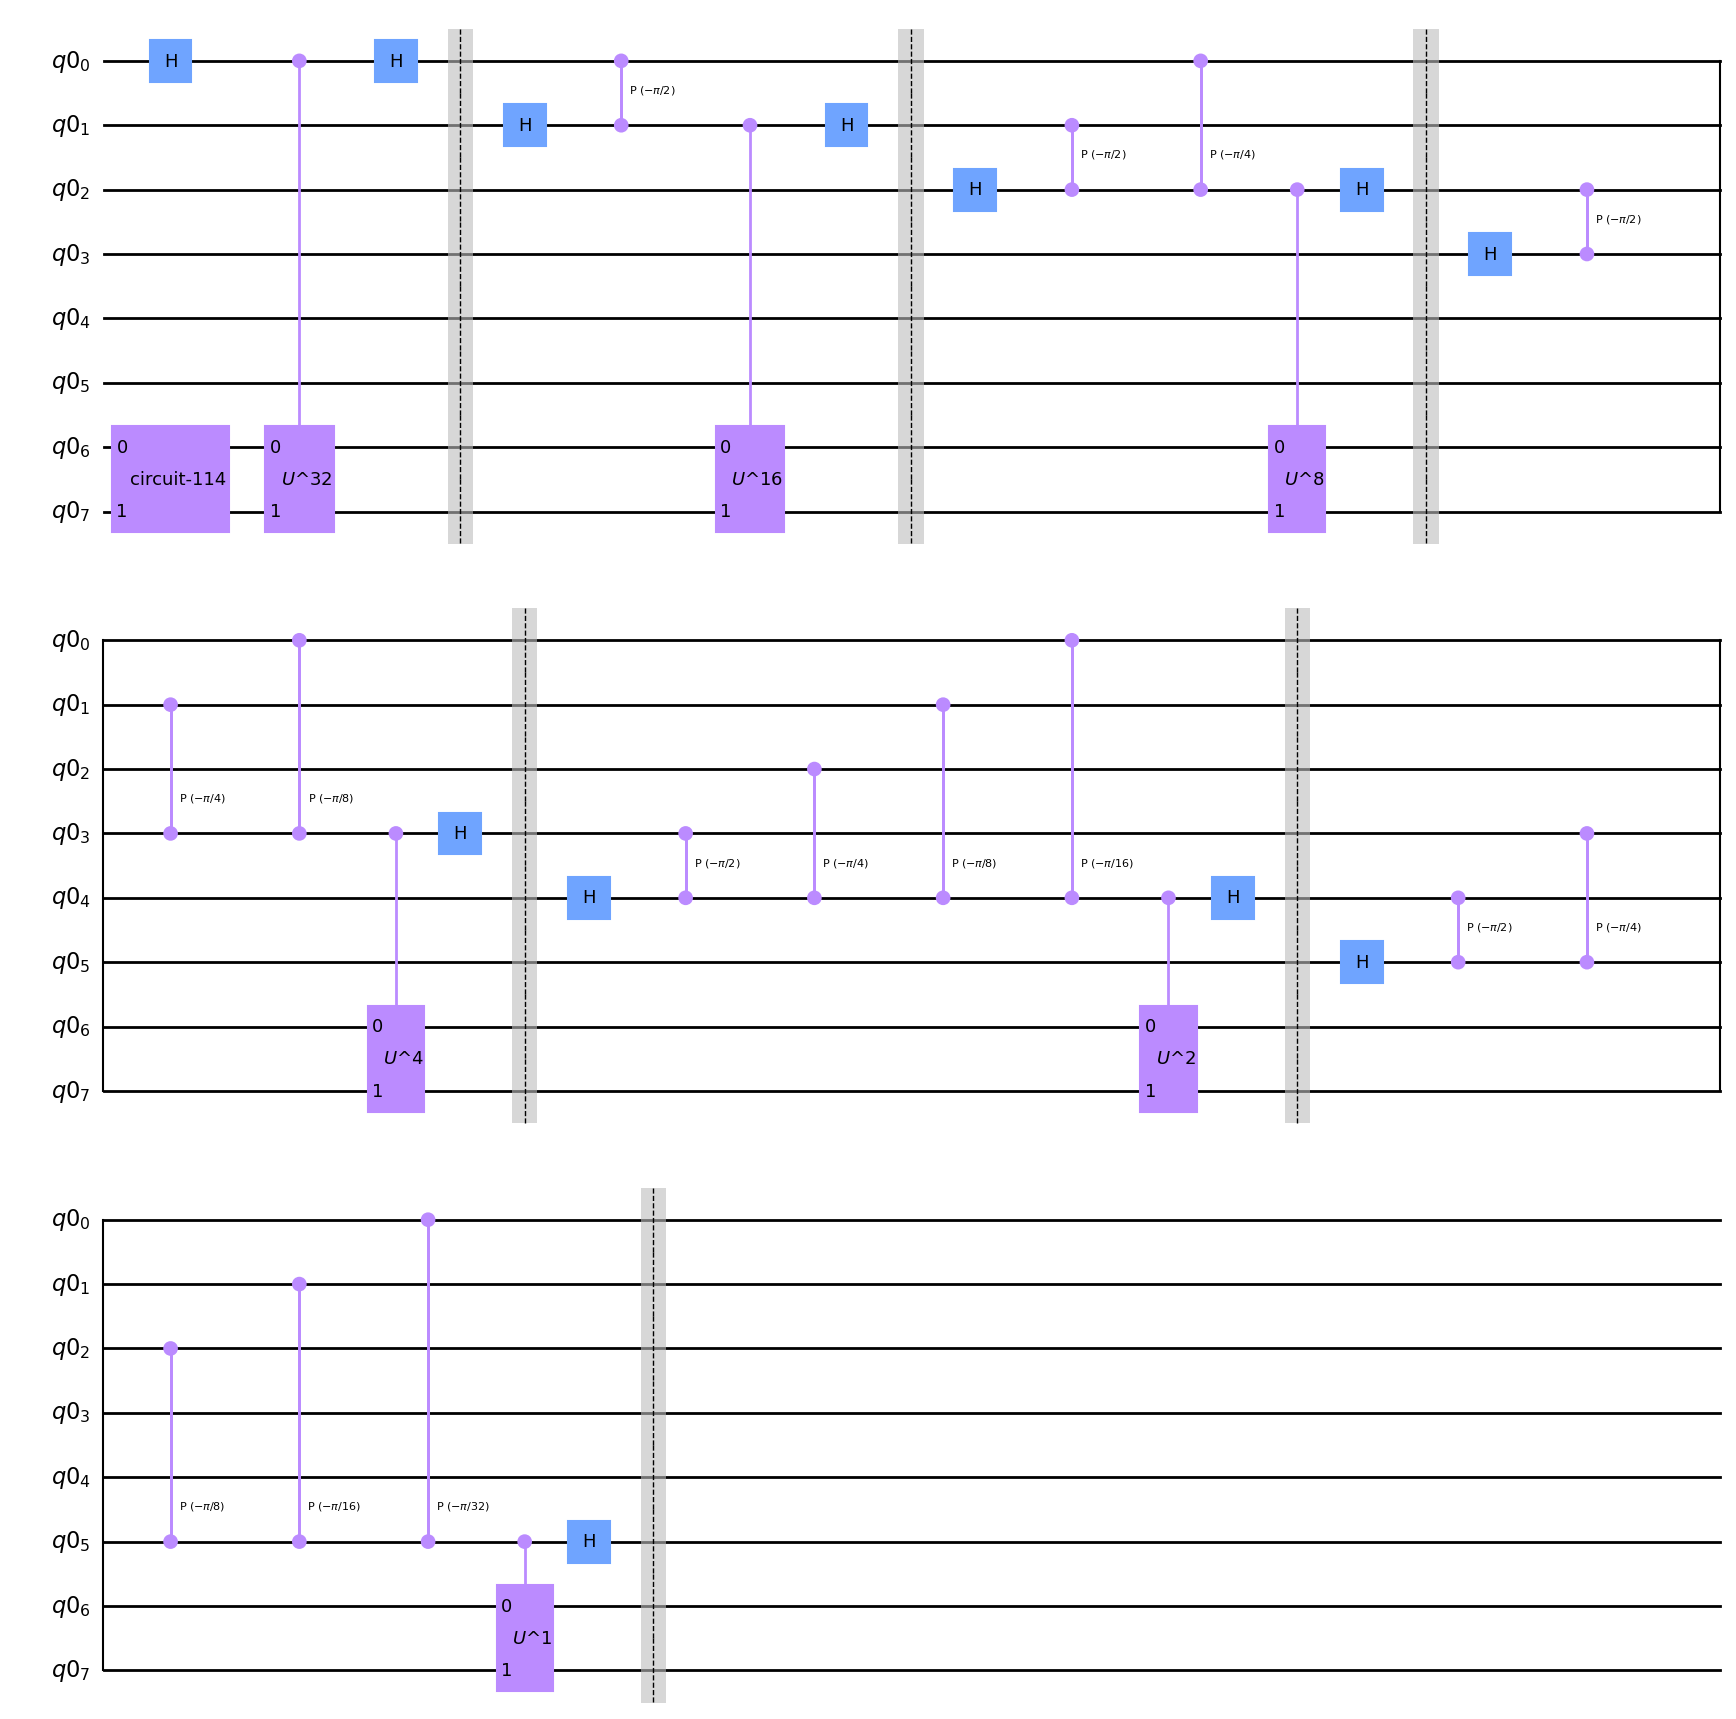

In [2]:
# U = np.array([
#     [1, 0],
#     [0, np.e ** (2 * np.pi * 1j * (2/7))]
# ])

U = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, np.e ** (2 * np.pi * 1j * (2/9))]
])


prepare_eigenvec = QuantumCircuit(2)
prepare_eigenvec.x([0, 1])

precision = 6

qc = phase_estimation(U, precision, prepare_eigenvec)
qc.draw('mpl')

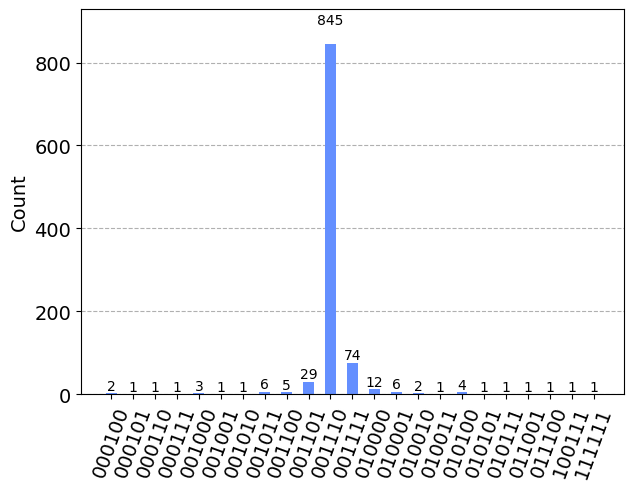

In [3]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

cr = ClassicalRegister(precision)
qc.add_register(cr)
qc.measure(list(range(precision)), cr)
sim = AerSimulator()
transpiled_circuit = transpile(qc, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)